In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
df=pd.read_csv('global_superstore_cleaned.csv')

In [101]:
print(f"Shape:{df.shape}")

Shape:(51290, 20)


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.Name   51290 non-null  object 
 4   Discount        51290 non-null  float64
 5   Market          51290 non-null  object 
 6   Order.Date      51290 non-null  object 
 7   Order.Priority  51290 non-null  object 
 8   Product.Name    51290 non-null  object 
 9   Profit          51290 non-null  float64
 10  Quantity        51290 non-null  int64  
 11  Region          51290 non-null  object 
 12  Sales           51290 non-null  float64
 13  Segment         51290 non-null  object 
 14  Ship.Date       51290 non-null  object 
 15  Ship.Mode       51290 non-null  object 
 16  Shipping.Cost   51290 non-null  float64
 17  State           51290 non-null 

In [103]:
df.head()

Category         City        Country     Customer.Name  Discount  \
0  Office Supplies  Los Angeles  United States  Lycoris Saunders       0.0   
1  Office Supplies  Los Angeles  United States     Mark Van Huff       0.0   
2  Office Supplies  Los Angeles  United States      Chad Sievert       0.0   
3  Office Supplies  Los Angeles  United States      Chad Sievert       0.0   
4  Office Supplies  Los Angeles  United States    Arthur Prichep       0.0   

  Market  Order.Date Order.Priority  \
0     US  2025-10-26           High   
1     US  2025-10-26         Medium   
2     US  2025-10-26         Medium   
3     US  2025-10-26         Medium   
4     US  2025-10-26           High   

                                        Product.Name   Profit  Quantity  \
0                                          Xerox 225   9.3312         3   
1          Wirebound Service Call Books, 5 1/2" x 4"   9.2928         2   
2  Adams Phone Message Book, Professional, 400 Me...   9.8418         3   
3                                         Xerox 1913  53.2608         2   
4                                          Xerox 223   3.1104         1   

  Region  Sales   Segment Ship.Date       Ship.Mode  Shipping.Cost  \
0   West   19.0  Consumer   00:00.0    Second Class           4.37   
1   West   19.0  Consumer   00:00.0  Standard Class           0.94   
2   West   21.0  Consumer   00:00.0  Standard Class           1.81   
3   West  111.0  Consumer   00:00.0  Standard Class           4.59   
4   West    6.0  Consumer   00:00.0  Standard Class           1.32   

        State Sub.Category  Year  
0  California        Paper  2011  
1  California        Paper  2011  
2  California        Paper  2011  
3  California        Paper  2011  
4  California        Paper  2011

# Step 1: Data Cleaning

In [104]:
df = df.drop(columns=['City', 'Country', 'Customer.Name', 'Market', 'Sub.Category','Segment', 'Order.Priority', 'Product.Name','Ship.Date','Ship.Mode','Shipping.Cost','State','Year'])

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Category    51290 non-null  object 
 1   Discount    51290 non-null  float64
 2   Order.Date  51290 non-null  object 
 3   Profit      51290 non-null  float64
 4   Quantity    51290 non-null  int64  
 5   Region      51290 non-null  object 
 6   Sales       51290 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 2.7+ MB


## 1.1 Remove Duplicates

In [106]:
# Remove duplicate rows
initial_rows=len(df)
df.drop_duplicates(inplace=True)
rows_removed=initial_rows-len(df)
print(f"\n Remoed{ rows_removed} duplicate rows.")


 Remoed9687 duplicate rows.


## 1.2 Handle Missing Values

In [107]:
# Filling Missing Data with mean

mean_value=df['Sales'].mean()
df['Sales'].fillna(mean_value,inplace=True)

print("\n Missing values remaining after cleaning:")
print(df.isnull().sum())


 Missing values remaining after cleaning:
Category      0
Discount      0
Order.Date    0
Profit        0
Quantity      0
Region        0
Sales         0
dtype: int64


In [108]:
df.rename(columns={'Order.Date': 'Order_Date'}, inplace=True)
print(df['Order_Date'].dtype)


object


## 1.3 Detect and Handle Outliers (using IQR)

In [109]:
def handle_outliers_iqr(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1

    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR

    df[column]=np.where(df[column]<lower_bound,lower_bound,df[column])
    df[column]=np.where(df[column]>upper_bound,upper_bound,df[column])

    print(f"Outlier handled for {column} uisng IQR.")
    return df

df=handle_outliers_iqr(df.copy(),'Sales')
df=handle_outliers_iqr(df.copy(),'Profit')

Outlier handled for Sales uisng IQR.
Outlier handled for Profit uisng IQR.


In [110]:
print(df.describe().T)

            count        mean         std      min      25%    50%    75%  \
Discount  41603.0    0.155614    0.218091   0.0000   0.0000   0.00    0.2   
Profit    41603.0   13.337452   33.669399 -49.1955  -1.6782   8.08   30.0   
Quantity  41603.0    3.526164    2.315331   1.0000   2.0000   3.00    5.0   
Sales     41603.0  143.007019  148.727925   0.0000  30.0000  79.00  210.0   

               max  
Discount    0.8500  
Profit     77.5173  
Quantity   14.0000  
Sales     480.0000  


# Step 2: Statistical Analysis

In [111]:
# Descriptive Statistics
print("\n 2.1 Descriptive Statistical Analysis")
print(df[['Sales','Profit']].describe())

#Compute Correlations
print("\n 2.2 Correlation Matrix")
numerical_df=df.select_dtypes(include=np.number)
correlation_matrix=numerical_df.corr()
print(correlation_matrix)



 2.1 Descriptive Statistical Analysis
              Sales        Profit
count  41603.000000  41603.000000
mean     143.007019     13.337452
std      148.727925     33.669399
min        0.000000    -49.195500
25%       30.000000     -1.678200
50%       79.000000      8.080000
75%      210.000000     30.000000
max      480.000000     77.517300

 2.2 Correlation Matrix
          Discount    Profit  Quantity     Sales
Discount  1.000000 -0.602894 -0.020106 -0.117039
Profit   -0.602894  1.000000  0.135195  0.370035
Quantity -0.020106  0.135195  1.000000  0.322643
Sales    -0.117039  0.370035  0.322643  1.000000


# Step 3: Data Visualization

In [112]:
sns.set_style("whitegrid")

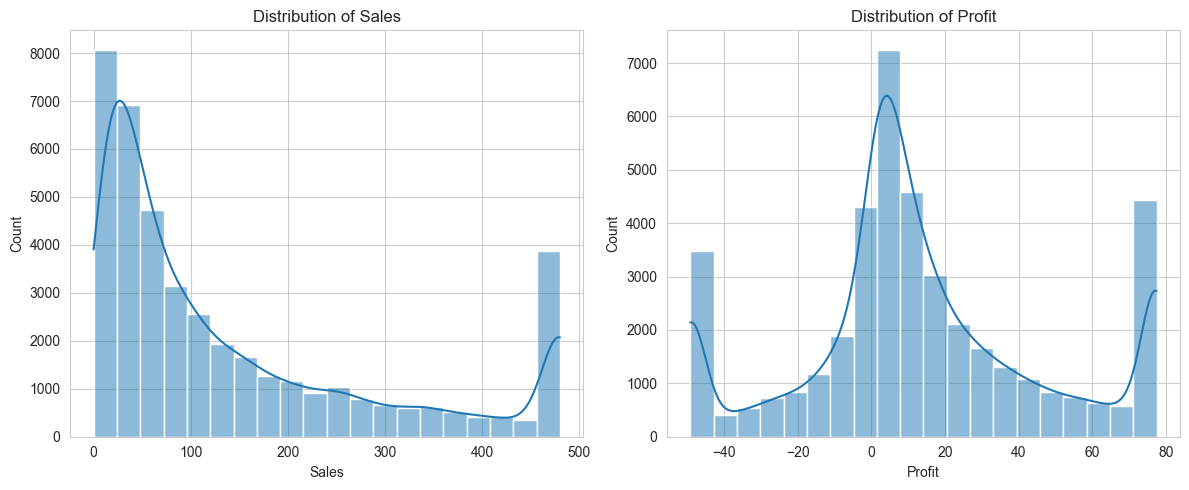

In [113]:
#3.1 Histogram(Distribution of Numerical Data)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Sales'],kde=True,bins=20)
plt.title('Distribution of Sales')


plt.subplot(1,2,2)
sns.histplot(df['Profit'],kde=True,bins=20)
plt.title('Distribution of Profit')

plt.tight_layout()
plt.show()

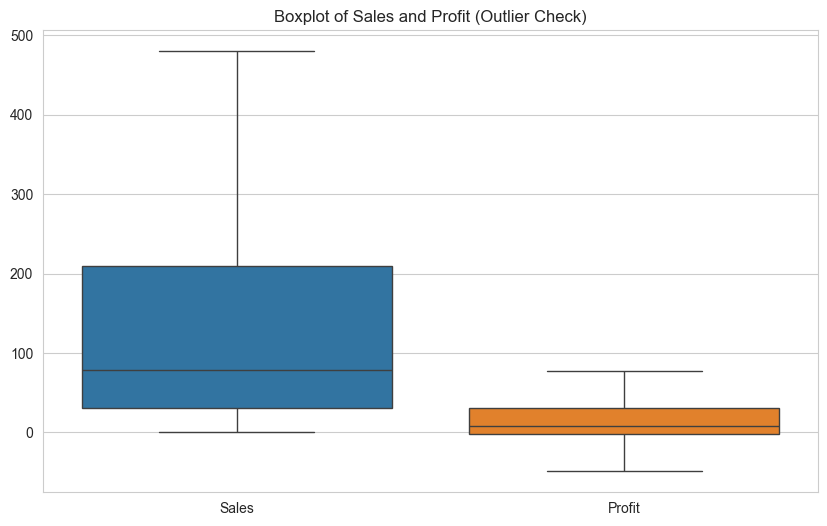

In [114]:
#3.2  Boxplots (Identify Outlier/Distribution)
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['Sales','Profit']])
plt.title('Boxplot of Sales and Profit (Outlier Check)')
plt.show()

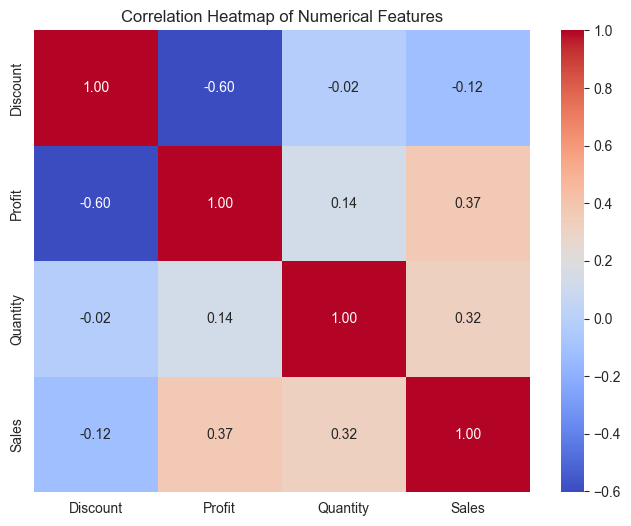

In [115]:
#3.3 Heatmap (Visualize Correlations)
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

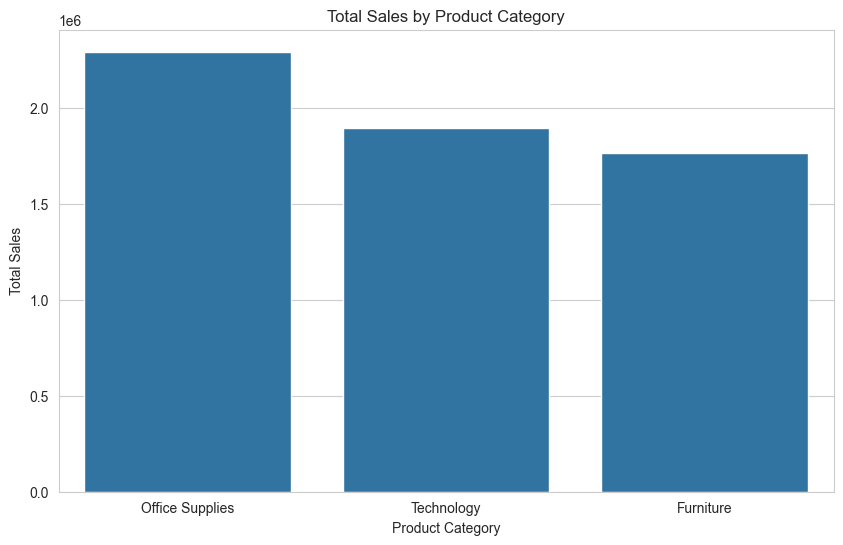

In [116]:
# 3.4 Bar Plot(Sales by Category)
plt.figure(figsize=(10,6))
sales_by_category=df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=sales_by_category.index,y=sales_by_category.values)
plt.title('Total Sales by Product Category')
plt.ylabel('Total Sales')
plt.xlabel('Product Category')
plt.show()

In [132]:
print(df.columns.tolist())


['Category', 'Discount', 'Order_Date', 'Profit', 'Quantity', 'Region', 'Sales']


In [118]:
print(df['Order_Date'].dtype)

object


In [119]:
df['Order_Date']=pd.to_datetime(df['Order_Date'])
print(df['Order_Date'].dtype)

datetime64[ns]


# Step 4:Sales Performance Analysis

## 1.1 Relationship between Profit and Discount (Scatter Plot)

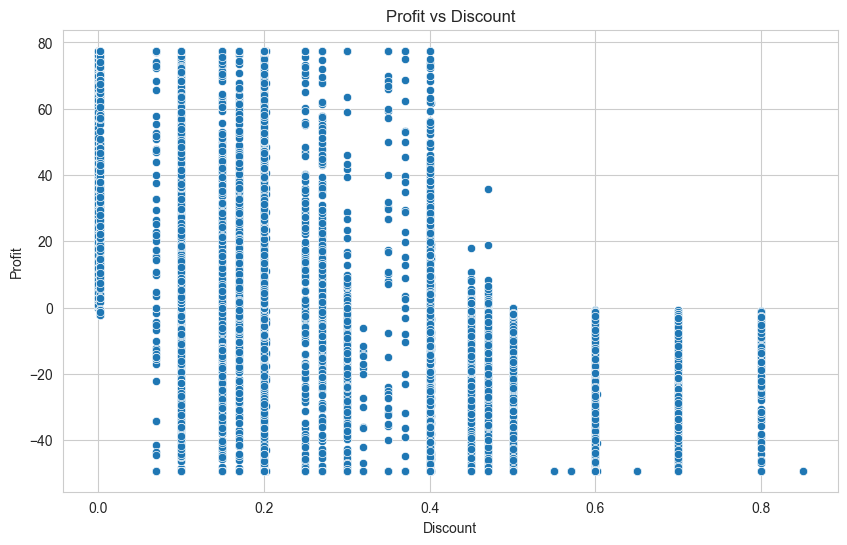

In [121]:
df_sales=df[['Discount','Profit']].copy()

plt.figure(figsize=(10,6))
sns.scatterplot(x='Discount',y='Profit',data=df_sales)
plt.title('Profit vs Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

## 1.2 Sales Distribution by Region and Category (Bar Plots)

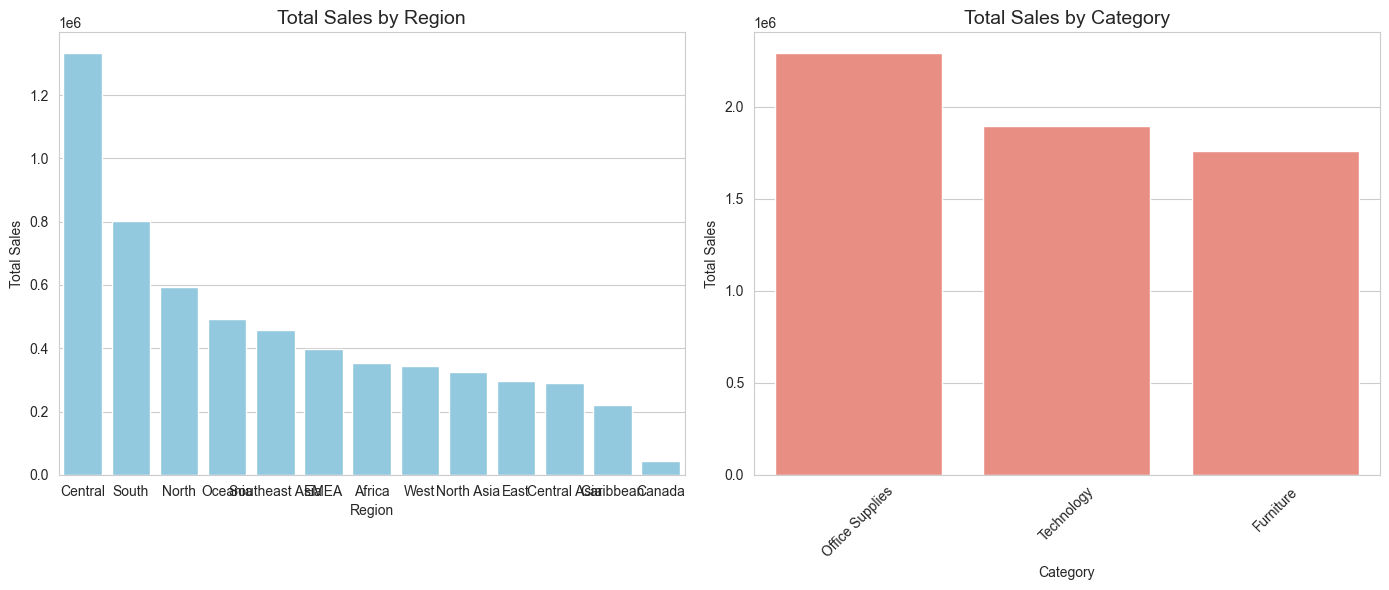

In [127]:
plt.figure(figsize=(14, 6))

# Sales by Region
plt.subplot(1, 2, 1)
region_sales = df.groupby('Region', as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)
sns.barplot(x='Region', y='Sales', data=region_sales, color='skyblue')  # use color instead of palette
plt.title('Total Sales by Region', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Total Sales')

# Sales by Category
plt.subplot(1, 2, 2)
category_sales = df.groupby('Category', as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)
sns.barplot(x='Category', y='Sales', data=category_sales, color='salmon')  # use color instead of palette
plt.title('Total Sales by Category', fontsize=14)
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Step 5: Predictive Modeling (Linear Regression)

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Optional: create df_sales if not already defined
df_sales = df[['Profit', 'Discount', 'Sales']].copy()

# --- Prepare Data ---
X = df_sales[['Profit', 'Discount']]  # Features
y = df_sales['Sales']                  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# --- Train Model ---
model = LinearRegression()
model.fit(X_train, y_train)
print("\nLinear Regression Model Trained ")

# --- Evaluate Model ---
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\nModel Performance Metrics:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Optional: Print coefficients for interpretation
print(f"\nModel Coefficients:")
print(f"Profit: {model.coef_[0]:.2f}")
print(f"Discount: {model.coef_[1]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")



Linear Regression Model Trained 

Model Performance Metrics:
R² Score: 0.1391
Mean Squared Error (MSE): 18763.51

Model Coefficients:
Profit: 2.11
Discount: 114.61
Intercept: 97.39


In [138]:
# Example of an Insight Report (This is qualitative and based on the results above)
insights_report = f"""
--- Insights and Recommendations for Improving Sales ---

1. Profit vs. Discount:
   - Observation: The scatter plot and the model coefficient show that (e.g., a higher 'Discount' generally leads to higher 'Sales' but negatively impacts 'Profit', as shown by the negative coefficient for Discount in the model.)
   - **Recommendation:** Determine an **optimal discount rate** that maximizes the sales-to-profit trade-off. Avoid discounts higher than [e.g., 20%] unless necessary for clearing old stock.

2. Top-Performing Regions/Categories:
   - Observation: The bar plots show that **{sales_by_region.index[0]}** is the top-performing region, and **{sales_by_category.index[0]}** is the top-performing category.
   - **Recommendation:** Invest further in these **top-performing regions/categories** while analyzing why the lowest-performing areas/products lag to create targeted improvement strategies.

3. Predictive Model (Linear Regression):
   - Observation: The model suggests **Profit** has a greater impact on Sales than Discount (based on coefficients).
   - **Recommendation:** Focus on product quality and strategic pricing to increase the profit margin, as this appears to be a strong driver of overall sales volume.
"""

print(insights_report)


--- Insights and Recommendations for Improving Sales ---

1. Profit vs. Discount:
   - Observation: The scatter plot and the model coefficient show that (e.g., a higher 'Discount' generally leads to higher 'Sales' but negatively impacts 'Profit', as shown by the negative coefficient for Discount in the model.)
   - **Recommendation:** Determine an **optimal discount rate** that maximizes the sales-to-profit trade-off. Avoid discounts higher than [e.g., 20%] unless necessary for clearing old stock.

2. Top-Performing Regions/Categories:
   - Observation: The bar plots show that **Central** is the top-performing region, and **Office Supplies** is the top-performing category.
   - **Recommendation:** Invest further in these **top-performing regions/categories** while analyzing why the lowest-performing areas/products lag to create targeted improvement strategies.

3. Predictive Model (Linear Regression):
   - Observation: The model suggests **Profit** has a greater impact on Sales than D